### 예제
1. csv 폴더에 있는 파일 4개 로드 (tran_1, tran_2, tran_d_1, tran_d_2) 각각 변수에 로드
2. tran_1, tran_2 단순한 행 결합
3. tran_d_1, tran_d_2 단순한 행 결합
4. 2번의 결과와 3번의 결과를 특정 조건에 맞춰서 열 결합(tran 기준으로)

In [76]:
import pandas as pd

In [77]:
tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [78]:
## tran_1, tran_2 단순한 행 결합
## concat() 함수를 이용해서 행을 추가 
tran = pd.concat([tran_1, tran_2], axis=0, ignore_index=True)

In [79]:
## tran_d_1, tran_d_2 단순한 행 결합
tran_d = pd.concat([tran_d_1, tran_d_2], axis=0, ignore_index=True)

In [80]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [81]:
tran_d.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [82]:
## 특정한 조건을 기준으로 하여 열 결합
## 조건 -> transaction_id
## tran, tran_d --> how -> left
transaction = pd.merge(tran, tran_d, on='transaction_id', how='left')

### 데이터결합2
1. customer_master, item_master 파일 두개 로드
2. 1번 과정에서 불러온 2개의 데이터를 transaction데이터프레임에 조건에 맞게 조인 결합
3. 결합이 된 데이터에서 quantity컬럼과 item_price컬럼을 가지고 total_price라는 파생변수를 생성
4. payment_date 컬럼을 시계열 데이터로 변경

In [83]:
## 파일 로드 
customer_master = pd.read_csv("../csv/customer_master.csv")
item_master = pd.read_csv("../csv/item_master.csv")

In [84]:
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [85]:
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [86]:
## transaction, customer_master 두개를 특정 조건에 맞춰서 결합
join_data = pd.merge(transaction, customer_master, on='customer_id', how='left')

In [87]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [88]:
## join_data, item_master 데이터프레임 조인 결합
total_data = pd.merge(join_data, item_master, on='item_id', how = 'left')

In [89]:
## 시계열로 데이터를 변경하는 함수
## to_datetime()
total_data["payment_date"] = pd.to_datetime(total_data["payment_date"])

In [90]:
## total_price 파생변수 생성
## quantity * item_price 
total_data["total_price"] = total_data["quantity"] * total_data["item_price"]

In [91]:
a = total_data["price"] != total_data["total_price"]
a.value_counts()

False    6447
True      697
dtype: int64

In [92]:
total_data.loc[a]

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
81,T0000000194,295000,2019-02-03 18:03:07,HD699115,81,S002,1,XXXXX,C01,F,2017-04-01 00:00:00,2019-02-28 00:00:00,CA1,1.0,PC-B,85000,85000
82,T0000000194,295000,2019-02-03 18:03:07,HD699115,82,S005,1,XXXXX,C01,F,2017-04-01 00:00:00,2019-02-28 00:00:00,CA1,1.0,PC-E,210000,210000
96,T0000000208,170000,2019-02-04 00:53:35,AS359364,96,S003,1,XX,C03,F,2015-10-01 00:00:00,NaN,CA1,0.0,PC-C,120000,120000
97,T0000000208,170000,2019-02-04 00:53:35,AS359364,97,S001,1,XX,C03,F,2015-10-01 00:00:00,NaN,CA1,0.0,PC-A,50000,50000
108,T0000000219,205000,2019-02-04 09:20:01,HD819739,108,S003,1,XX,C01,M,2017-07-01 00:00:00,2019-02-28 00:00:00,CA2,1.0,PC-C,120000,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,T0000006829,330000,2019-07-30 07:26:30,GD862018,7072,S003,1,XXXX,C02,F,2017-06-01 00:00:00,2018-06-30 00:00:00,CA1,1.0,PC-C,120000,120000
7107,T0000006864,100000,2019-07-31 03:42:20,IK341016,7107,S001,1,XXX,C01,M,2017-03-01 00:00:00,2018-04-30 00:00:00,CA1,1.0,PC-A,50000,50000
7108,T0000006864,100000,2019-07-31 03:42:20,IK341016,7108,S001,1,XXX,C01,M,2017-03-01 00:00:00,2018-04-30 00:00:00,CA1,1.0,PC-A,50000,50000
7128,T0000006884,260000,2019-07-31 18:12:37,PL491769,7128,S001,1,XXXX,C03,F,2018-09-14 00:00:00,2018-10-31 00:00:00,CA1,1.0,PC-A,50000,50000


In [93]:
## 시계열데이터를 이용하는 예제
## 시계열데이터에서 년, 월 추출해서 새로운 파생변수 생성
## payment_month 컬럼을 생성
total_data["payment_month"] = total_data["payment_date"].dt.strftime("%Y-%m")

## 그룹화, 시각화 예제
1. payment_month 컬럼 기준으로 그룹화
2. total_price의 합계, price의 합계를 라인 그래프로 시각화
3. subplot이용하여 2개의 그래프 출력

In [94]:
## 그룹화 -> groupby()
group_data = total_data.groupby('payment_month').sum()

In [95]:
import matplotlib.pyplot as plt

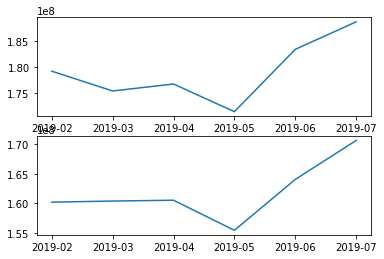

In [96]:
plt.subplot(2, 1, 1)
plt.plot(group_data["price"])
plt.subplot(2, 1, 2)
plt.plot(group_data["total_price"])
plt.show()

In [97]:
total_data.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,2019-02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,2019-02
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,2019-02


In [98]:
total_data["gender"]

0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

In [99]:
## apply() 함수를 이용하여 gender 컬럼의 데이터를 M -> 남, F -> 여, NaN -> 무응답 로 변경
def change(x):
    # print(x, end=" ")
    if x == "F":
        # print('여', end=" ")
        return "여"
    elif x == "M":
        # print('남', end = " ")
        return "남"
    else:
        # print("무응답", end = " ")
        return "무응답"


total_data["gender"] = total_data["gender"].apply(change)

## apply() 함수에서 change 함수 호출 횟수? -> total_data["gender"] 값의 길이
## 데이터의 값을 change 함수에 x라는 매개변수에 value 값을 담아서 실행
## 첫번째 함수가 실행이 됬을때 x의 값은 ? -> M

In [100]:
total_data.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,2019-02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,2019-02
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,2019-02


In [101]:
total_data

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,2019-02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,2019-02
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000,2019-07
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000,2019-07
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000,2019-07
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000,2019-07


In [102]:
## apply(), lambda() 같이 사용하는 방법

total_data["gender"].apply(lambda x : "여" if (x == "F") else (
    "남" if x == "M" else "무응답"
) )

0         남
1         남
2         여
3         남
4         남
       ... 
7139    무응답
7140      남
7141      여
7142    무응답
7143      남
Name: gender, Length: 7144, dtype: object